<a href="https://colab.research.google.com/github/fact-h/1D-CNN-flood/blob/main/1D_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
y_true = np.array([10,40,60,27.5,50])
y_pred = np.array([7,31,66,36,58])
n = len(y_true)
mape = sum(np.abs((y_true - y_pred)/y_true))/n*100
print(mape)

21.88181818181818


Optimal Control Input: 10.0
Current Water Level: 5.5
Optimal Control Input: 10.0
Current Water Level: 5.95
Optimal Control Input: 10.0
Current Water Level: 6.355
Optimal Control Input: 10.0
Current Water Level: 6.719500000000001
Optimal Control Input: 9.526665363498555
Current Water Level: 7.000216536349857
Optimal Control Input: 7.006748073566565
Current Water Level: 7.000869690071528
Optimal Control Input: 7.000907523515043
Current Water Level: 7.000873473415879
Optimal Control Input: 7.0008736533938105
Current Water Level: 7.000873491413673
Optimal Control Input: 7.000873533725783
Current Water Level: 7.000873495644884
Optimal Control Input: 7.000873448821323
Current Water Level: 7.000873490962528
Optimal Control Input: 7.000873562359062
Current Water Level: 7.000873498102182
Optimal Control Input: 7.000873403120087
Current Water Level: 7.000873488603973
Optimal Control Input: 7.0008735175981105
Current Water Level: 7.000873491503387
Optimal Control Input: 7.000873502278585
Current 

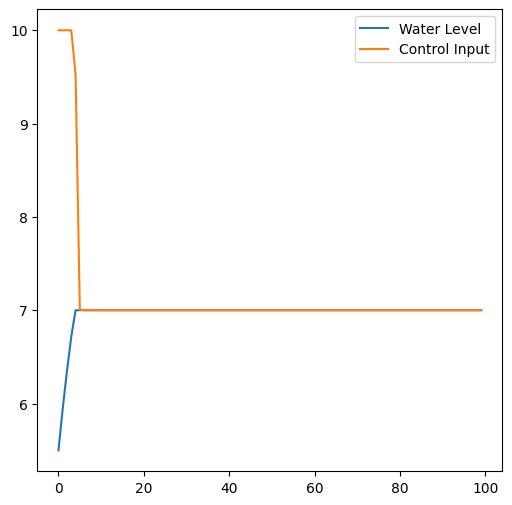

In [ ]:
import numpy as np
from scipy.optimize import minimize
from matplotlib import pyplot as plt

# Define system dynamics model (simplified)
def system_model(x, u):
    # Example dynamics: simple first-order system
    # x: state vector [current water level]
    # u: control input vector [gate position]
    A = 0.9  # Example system parameter
    B = 0.1  # Example system parameter
    x_next = A * x + B * u
    return x_next

# Define objective function to be minimized
def objective_function(u, x0, horizon):
    cost = 0
    x = x0
    for i in range(horizon):
        cost += (x - setpoint)**2  # Example quadratic cost function
        x = system_model(x, u[i])
    return cost

# Define constraints
def constraint_function(u):
    # Example constraint: gate position limits
    return np.concatenate((u - u_min, u_max - u))

# Initial state and setpoint
x0 = 5.0  # Initial water level
setpoint = 7.0  # Desired water level

# MPC parameters
horizon = 10  # MPC horizon (number of steps)
u_min = 0.0  # Minimum gate position
u_max = 10.0  # Maximum gate position

waterLevel = []
controlInput = []

# MPC loop
for _ in range(100):  # Example number of MPC iterations
    # Initial guess for control input
    u_init = np.ones(horizon) * 5.0  # Example initial guess

    # Solve optimization problem using scipy.optimize.minimize
    res = minimize(objective_function, u_init, args=(x0, horizon),
                   constraints={'type': 'ineq', 'fun': constraint_function})

    # Extract optimal control input
    u_optimal = res.x

    # Apply first control input to the system
    u_applied = u_optimal[0]
    x0 = system_model(x0, u_applied)

    # Print results (for illustration)
    print("Optimal Control Input:", u_applied)
    print("Current Water Level:", x0)

    waterLevel.append(x0)
    controlInput.append(u_applied)

plt.figure(figsize=[6,6])
plt.plot(waterLevel, label='Water Level')
plt.plot(controlInput, label='Control Input')
plt.legend()
plt.show()

In [ ]:
def objective_function(u, x0, horizon):
    cost = 0
    x = x0
    for i in range(horizon):
        cost += (x - setpoint)**2  # Example quadratic cost function
        x = system_model(x, u[i])
    return cost

for _ in range(100):  # Example number of MPC iterations

    u_init = np.ones(horizon) * 5.0  # Initial guess for control input

    # Solve optimization problem using scipy.optimize.minimize
    res = minimize(objective_function, u_init, args=(x0, horizon),
                   constraints={'type': 'ineq', 'fun': constraint_function})

    # Extract optimal control input
    u_optimal = res.x

    # Apply first control input to the system
    u_applied = u_optimal[0]
    x0 = system_model(x0, u_applied)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20301 (\N{CJK UNIFIED IDEOGRAPH-4F4D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38392 (\N{CJK UNIFIED IDEOGRAPH-95F8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38376 (\N{CJK UNIFIED IDEOGRAPH-95E8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24320 (\N{CJK UNIFIED IDEOGRAPH-5F00}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

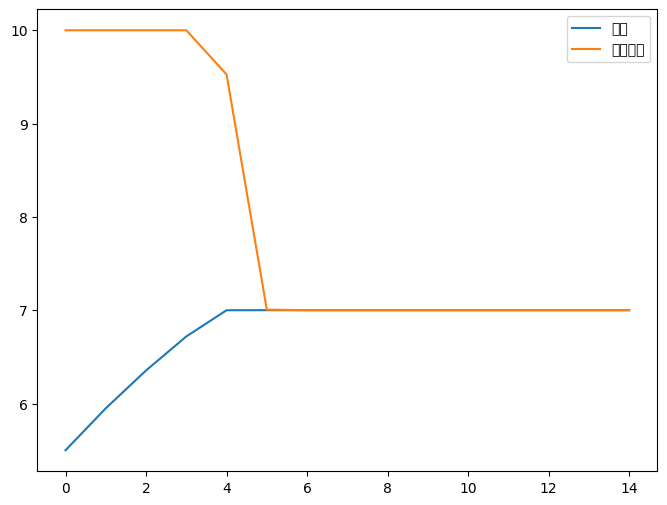

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(waterLevel[0:15], label='Water Level')
plt.plot(controlInput[0:15], label='Control Input')
plt.legend()
plt.show()

In [ ]:
obs = [10, 40, 60, 27.5, 50]
simu = [7, 31, 66, 36, 58]

NSE = r2_score(obs, simu)
print(NSE)

0.828032786885246


In [ ]:
CNN1 = np.loadtxt('CNN1_predictions.csv',delimiter=',')
CNN2 = np.loadtxt('CNN2_predictions.csv',delimiter=',')
CNN3 = np.loadtxt('test_predictions3.csv',delimiter=',')
real = np.loadtxt('y_test_array.csv',delimiter=',')

In [ ]:
from scipy import stats

x = stats.kruskal(CNN1, real)
sum(x.pvalue)/len(x.pvalue)

8.333061013188428e-11

In [ ]:
x = stats.kruskal(CNN2, real)

sum(x.pvalue)/len(x.pvalue)

0.13734393409179863

In [ ]:
xs = stats.kruskal(CNN3, real)

sum(xs.pvalue)/len(xs.pvalue)

1.1231321426013469e-05

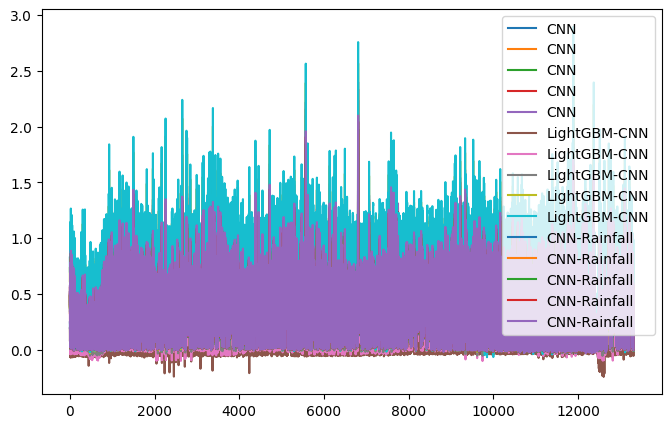

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(CNN1, label = 'CNN')
plt.plot(CNN2, label = 'LightGBM-CNN')
plt.plot(CNN3, label = 'CNN-Rainfall')
plt.legend()
plt.show()

In [ ]:
# RMSE
rmse_CNN1 = 0
rmse_CNN2 = 0
rmse_CNN3 = 0
for i in range(5):
  rmse_CNN = np.sqrt(mean_squared_error(real[:,i], CNN1[:,i]))
  rmse_CNN1 = np.c_[rmse_CNN1,rmse_CNN]
  rmse_CNN = np.sqrt(mean_squared_error(real[:,i], CNN2[:,i]))
  rmse_CNN2 = np.c_[rmse_CNN2,rmse_CNN]
  rmse_CNN = np.sqrt(mean_squared_error(real[:,i], CNN3[:,i]))
  rmse_CNN3 = np.c_[rmse_CNN3,rmse_CNN]

# MAE
mae1 =0
mae2 =0
mae3 =0
for i in range(5):
  mae = mean_absolute_error(real[:,i], CNN1[:,i])
  mae1 = np.c_[mae1,mae]
  mae = mean_absolute_error(real[:,i], CNN2[:,i])
  mae2 = np.c_[mae2,mae]
  mae = mean_absolute_error(real[:,i], CNN3[:,i])
  mae3 = np.c_[mae3,mae]

In [ ]:
np.r_[rmse_CNN1,rmse_CNN2,rmse_CNN3]

array([[0.        , 0.1612617 , 0.14823937, 0.09837625, 0.17018023,
        0.24981447],
       [0.        , 0.10651819, 0.13777011, 0.06834387, 0.05949046,
        0.13405812],
       [0.        , 0.28314811, 0.14935917, 0.12446118, 0.2399283 ,
        0.3190396 ]])

In [ ]:
np.r_[mae1,mae2,mae3]

array([[0.        , 0.12751611, 0.06495453, 0.06819771, 0.15193302,
        0.20991042],
       [0.        , 0.07287941, 0.04113824, 0.0219645 , 0.03064255,
        0.0530182 ],
       [0.        , 0.24155316, 0.0631136 , 0.09285577, 0.21532428,
        0.28069158]])

# 基于机器学习的城市洪涝快速模拟研究

- 目标：根据降雨和潮位的序列信息预测某点的最大水深
- 使用的机器学习算法：[LightGBM](https://lightgbm.readthedocs.io/en/latest/)
- 模型输入特征：10个降雨和潮位特征、1个淹没点分类特征
- 模型输出变量：最大水深
- 选取点：

1. SJ10401
2. SJ18385
3. SJ16484
4. SJ20705
5. SJ13082
6. SJ8600
7. SJ10479
8. SJ14592
9. SJ15316
10. SJ21244

v4.2：加入神经网络

v4.1：对训练集及验证集添加了百分之一的随机噪声，使训练结果更平滑

v4.0：更改数据划分方式，将随机划分改为人为划分

v3.0：增加了一列关于点名称的特征，选取10个点，可预测这10个点的最大水深。

v2.0：相较于v1.0，本版本增加了多个学习模型作为基准模型，以验证LightGBM模型的性能。

结果：

|	方法	|	LightGBM	|	RF	|	XGBoost	| SVR |	决策树 | KNN |
|	-------  |	------------	| ------- | ----------- | ----- | -------- | -----|
|	NSE		|	     |  |      |  |  |  |

v1.1：增加了特征重要性绘制

v1.0：完成基础功能--训练和预测，RMSE、NSE指标评估

## 导入相关的模块

In [ ]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

from sklearn.neural_network import MLPRegressor

%matplotlib inline

try:
    # To enable interactive mode you should install ipywidgets
    # https://github.com/jupyter-widgets/ipywidgets
    from ipywidgets import interact, SelectMultiple
    INTERACTIVE = True
except ImportError:
    INTERACTIVE = False

## 加载原始数据
先上传两个CSV数据文件：
- `E:\小论文\论文\数据\CNN训练数据\X.csv`
- `E:\小论文\论文\数据\CNN训练数据\newy.csv`
- `E:\小论文\论文\数据\CNN训练数据\partDepth.csv`

X数据集存储的是各降雨和潮位的时间序列，每一列是一个序列，y数据集存储的是降雨-潮位组合情景。这两个数据集并不是模型直接使用的数据，模型使用的数据是提取特征后的数据，后面会进行特征的提取。partDepth存储的是淹没网格的最大水深，删区了非淹没区网格。

In [ ]:
df_X_raw = pd.read_csv('/content/X.csv')
#df_y = pd.read_csv('/content/y.csv')
#df_newY = pd.read_csv('/content/newY.csv')
df_d = pd.read_csv('/content/partDepth.csv')

In [ ]:
df_depth = df_d.transpose()
df_depth = df_depth.reset_index(drop=True)

In [ ]:
df_depth

,0,1,2,3,4,5,6,7,8,9,...,13304,13305,13306,13307,13308,13309,13310,13311,13312,13313
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.01,0.00,0.00,0.44,0.00,0.00,0.00,0.00,0.00,0.00
1,0.09,0.21,0.16,0.14,0.00,0.00,0.00,0.13,0.16,0.00,...,0.03,0.00,0.00,0.45,0.13,0.00,0.17,0.00,0.00,0.00
2,0.18,0.31,0.26,0.24,0.00,0.00,0.00,0.23,0.26,0.00,...,0.08,0.00,0.01,0.46,0.45,0.38,0.48,0.08,0.00,0.00
3,0.32,0.44,0.39,0.37,0.00,0.00,0.06,0.36,0.39,0.34,...,0.14,0.00,0.04,0.47,0.60,0.53,0.64,0.23,0.00,0.00
4,0.46,0.58,0.53,0.51,0.00,0.00,0.20,0.50,0.54,0.48,...,0.20,0.00,0.09,0.48,0.69,0.62,0.73,0.32,0.00,0.00
5,0.60,0.72,0.67,0.65,0.00,0.13,0.35,0.64,0.67,0.63,...,0.28,0.03,0.16,0.51,0.79,0.72,0.83,0.42,0.00,0.00
6,0.70,0.82,0.77,0.75,0.03,0.23,0.45,0.74,0.77,0.73,...,0.35,0.08,0.22,0.56,0.86,0.79,0.90,0.49,0.00,0.00
7,0.06,0.18,0.13,0.11,0.00,0.00,0.00,0.10,0.14,0.00,...,0.08,0.03,0.03,0.51,0.00,0.00,0.00,0.00,0.00,0.00
8,0.12,0.24,0.19,0.17,0.00,0.00,0.00,0.16,0.19,0.00,...,0.10,0.03,0.05,0.51,0.16,0.00,0.19,0.00,0.00,0.00
9,0.20,0.32,0.27,0.25,0.00,0.00,0.00,0.24,0.28,0.03,...,0.14,0.04,0.07,0.52,0.46,0.38,0.49,0.09,0.00,0.00


## 提取特征
10个特征：
- 6个降雨相关的特征：**累计降雨量 降雨重现期 降雨峰值 最大2h降雨量 最大3h降雨量 峰值前累计降雨量**
- 4个潮位相关的特征：**最大潮位 潮位重现期 平均潮位 最大5h平均潮位**

In [ ]:
#@title 创建降雨的特征DataFrame: `rain_feature_df`和创建潮位的有关特征DataFrame: `tide_feature_df` { display-mode: "form" }
# 新建一个降雨DataFrame
rain_feature_df = pd.DataFrame()

# 添加累计降雨量
rain_feature_df['CumRainfall'] = df_X_raw.iloc[:,2:9].sum()

# 添加降雨重现期
rain_feature_df['RainRP'] = [5,10,20,35,50,75,100]

# 添加降雨峰值
rain_feature_df['RainfallPeak'] = df_X_raw.iloc[:,2:9].max()

# 添加最大2h降雨量
rain_feature_df['MaxRainfall2h'] = np.add(df_X_raw.iloc[0:-2,2:9], df_X_raw.iloc[1:-1,2:9]).max()

# 添加最大3h降雨量
rain_feature_df['MaxRainfall3h'] = np.add(np.add(df_X_raw.iloc[0:-3,2:9],df_X_raw.iloc[1:-2,2:9]),df_X_raw.iloc[2:-1,2:9]).max()

# 添加峰值前累计降雨量
peak_index = df_X_raw[df_X_raw.iloc[:,2]==rain_feature_df['RainfallPeak'][0]].index.tolist()[0]
rain_feature_df['CumRainfallBeforePeak'] = df_X_raw.iloc[0:peak_index,2:9].sum()



# 创建一个从潮位中提取的特征DataFrame
tide_feature_df = pd.DataFrame()

# 添加最大潮位
tide_feature_df['MaxTide'] = df_X_raw.iloc[:,9:].max()

# 添加潮位重现期
tide_feature_df['TideRP'] = [5,10,20,35,50,75,100]

# 添加平均潮位
tide_feature_df['MeanTide'] = df_X_raw.iloc[:,9:].mean()

# 添加最大5h平均潮位
tide_feature_df['MaxTide5h'] = np.add(
    np.add(np.add(
        np.add(df_X_raw.iloc[0:-5,9:],df_X_raw.iloc[1:-4,9:]),
        df_X_raw.iloc[2:-3,9:]),df_X_raw.iloc[3:-2,9:]),
        df_X_raw.iloc[4:-1,9:]).max()/5

<ipython-input-4-2d547023df7e>:15: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  rain_feature_df['MaxRainfall2h'] = np.add(df_X_raw.iloc[0:-2,2:9], df_X_raw.iloc[1:-1,2:9]).max()
<ipython-input-4-2d547023df7e>:18: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy a

In [ ]:
rain_feature_df

,CumRainfall,RainRP,RainfallPeak,MaxRainfall2h,MaxRainfall3h,CumRainfallBeforePeak
rain5,199.101882,5,56.394737,86.377019,99.455229,35.806351
rain10,242.672478,10,68.735917,105.279393,121.219581,43.642058
rain20,288.152174,20,81.617842,125.009998,143.937566,51.821097
rain35,327.041437,35,92.633056,141.881454,163.363503,58.814916
rain50,352.897968,50,99.956805,153.098877,176.279339,63.464938
rain75,383.665366,75,108.671536,166.446798,191.648247,68.998126
rain100,406.171863,100,115.046402,176.210865,202.890676,73.045680


In [ ]:
tide_feature_df

,MaxTide,TideRP,MeanTide,MaxTide5h
tide5,2.898900,5,1.872049,2.579491
tide10,3.159600,10,2.040403,2.811467
tide20,3.400900,20,2.196230,3.026179
tide35,3.585497,35,2.315439,3.190437
tide50,3.701200,50,2.390157,3.293392
tide75,3.827370,75,2.471635,3.405660
tide100,3.917500,100,2.529839,3.485859


## 组合数据

### 将降雨特征、潮位特征和最大水深组合在一起，形成49条数据样本
先将降雨的每一行复制7遍，再用`concat`方法将7组潮位数据首尾相连，即相当于整个复制7遍。

然后使用`join`方法连接降雨和潮位，每个重现期的降雨对应7个重现期的潮位。最后再将水深数据加上，得到总的数据集`df_data`。

In [ ]:
# 重置索引，将索引换为数字形式，方便后面数据组合
rain_feature_df = rain_feature_df.reset_index(drop=True) # 重置索引后将原索引所在的列删除
tide_feature_df = tide_feature_df.reset_index(drop=True)

# 将降雨数据的每一行复制7遍
rain_repeat_df = pd.DataFrame(np.repeat(rain_feature_df.values,tide_feature_df.shape[0],axis=0))
rain_repeat_df.columns = rain_feature_df.columns
# 将所有潮位数据整体复制7遍，concat方法是拼接数据
tide_concat_df = pd.concat([tide_feature_df, tide_feature_df, tide_feature_df, tide_feature_df, tide_feature_df, tide_feature_df, tide_feature_df]).reset_index(drop=True)

# 组合降雨和潮位特征数据
df_X = rain_repeat_df.join(tide_concat_df)


# 添加输出变量-水深
df_data = df_X.join(df_depth)

df_data

,CumRainfall,RainRP,RainfallPeak,MaxRainfall2h,MaxRainfall3h,CumRainfallBeforePeak,MaxTide,TideRP,MeanTide,MaxTide5h,...,13304,13305,13306,13307,13308,13309,13310,13311,13312,13313
0,199.101882,5.0,56.394737,86.377019,99.455229,35.806351,2.898900,5,1.872049,2.579491,...,0.01,0.00,0.00,0.44,0.00,0.00,0.00,0.00,0.00,0.00
1,199.101882,5.0,56.394737,86.377019,99.455229,35.806351,3.159600,10,2.040403,2.811467,...,0.03,0.00,0.00,0.45,0.13,0.00,0.17,0.00,0.00,0.00
2,199.101882,5.0,56.394737,86.377019,99.455229,35.806351,3.400900,20,2.196230,3.026179,...,0.08,0.00,0.01,0.46,0.45,0.38,0.48,0.08,0.00,0.00
3,199.101882,5.0,56.394737,86.377019,99.455229,35.806351,3.585497,35,2.315439,3.190437,...,0.14,0.00,0.04,0.47,0.60,0.53,0.64,0.23,0.00,0.00
4,199.101882,5.0,56.394737,86.377019,99.455229,35.806351,3.701200,50,2.390157,3.293392,...,0.20,0.00,0.09,0.48,0.69,0.62,0.73,0.32,0.00,0.00
5,199.101882,5.0,56.394737,86.377019,99.455229,35.806351,3.827370,75,2.471635,3.405660,...,0.28,0.03,0.16,0.51,0.79,0.72,0.83,0.42,0.00,0.00
6,199.101882,5.0,56.394737,86.377019,99.455229,35.806351,3.917500,100,2.529839,3.485859,...,0.35,0.08,0.22,0.56,0.86,0.79,0.90,0.49,0.00,0.00
7,242.672478,10.0,68.735917,105.279393,121.219581,43.642058,2.898900,5,1.872049,2.579491,...,0.08,0.03,0.03,0.51,0.00,0.00,0.00,0.00,0.00,0.00
8,242.672478,10.0,68.735917,105.279393,121.219581,43.642058,3.159600,10,2.040403,2.811467,...,0.10,0.03,0.05,0.51,0.16,0.00,0.19,0.00,0.00,0.00
9,242.672478,10.0,68.735917,105.279393,121.219581,43.642058,3.400900,20,2.196230,3.026179,...,0.14,0.04,0.07,0.52,0.46,0.38,0.49,0.09,0.00,0.00


In [ ]:
# 相关系数
# x = df_data['MaxTide']
# y = df_data['depth']
# p1 = np.corrcoef(x,y)
# p1

### 数据归一化

In [ ]:
# 对原始数据增加噪声
df_data = df_data + df_data * 0.01 * np.random.standard_normal(size=df_data.shape)

# 归一化：z-score
df_data_norm = df_data

#df_data_mean = df_data.iloc[:,0:10].mean()
#df_data_std = df_data.iloc[:,0:10].std()

#df_data_norm.iloc[:,0:10] = (df_data.iloc[:,0:10] - df_data_mean) / df_data_std
#df_data_norm # 总数据

In [ ]:
df_data_norm.iloc[:,0:10] = pd.DataFrame(MinMaxScaler().fit_transform(df_data.iloc[:,0:10]))

### 在总数据集中剔除测试集，并打乱数据

In [ ]:
# 选择34场工况作为训练集，10场作为验证集，5场作为测试集，选取的测试工况为5，20，35，75，100

test_df = df_data_norm.iloc[[0,16,24,40,48]] # 5组测试集数据

train_df = df_data_norm.drop(index=[0,16,24,40,48],axis='row')
train_df = train_df.reset_index(drop='True')

In [ ]:
# 打乱数据，得到最终数据，后面不再对数据做任何处理
train_valid = train_df.reindex(np.random.permutation(train_df.index))

train_valid = train_df.reset_index(drop=True)

### 划分训练集、验证集和测试集

In [ ]:
# 创建训练集、验证集和测试集
# 34组训练集数据，10组验证集数据，5组测试集数据
val_split = round(0.2 * df_data_norm.shape[0])

y_test = test_df.iloc[:,10:test_df.shape[1]]
y_val = train_valid.iloc[0:val_split,10:test_df.shape[1]]
y_train = train_valid.iloc[val_split:,10:test_df.shape[1]]

#####
X_test = test_df.iloc[:,0:10]
X_val = train_valid.iloc[0:val_split,0:10]
X_train = train_valid.iloc[val_split:train_valid.shape[0],0:10]

X_train = X_train.reset_index(drop=True)

# 选取特定的特征
#my_features = ['MaxTide', 'CumRainfall', 'Point']
#X_test = X_test[my_features]
#X_val = X_val[my_features]
#X_train = X_train[my_features]

In [ ]:
X_train_array = X_train.values
y_train_array = y_train.values
X_val_array = X_val.values
y_val_array = y_val.values
X_test_array = X_test.values
y_test_array = y_test.values

In [ ]:
X_train

,CumRainfall,RainRP,RainfallPeak,MaxRainfall2h,MaxRainfall3h,CumRainfallBeforePeak,MaxTide,TideRP,MeanTide,MaxTide5h
0,0.221600,0.053832,0.204440,0.217029,0.250985,0.216025,0.839617,0.467962,0.724429,0.748565
1,0.211395,0.052742,0.216135,0.214562,0.216710,0.209846,0.895783,0.727551,0.819600,0.905810
2,0.221859,0.053360,0.215057,0.220637,0.226893,0.229235,1.000000,0.989466,0.987413,0.907297
3,0.434654,0.154599,0.445135,0.432222,0.418729,0.447761,0.026769,0.000010,0.035570,0.054271
4,0.433524,0.155029,0.407731,0.418289,0.448839,0.425303,0.314606,0.051497,0.270178,0.277203
5,0.441668,0.153043,0.442001,0.443804,0.436095,0.427047,0.645429,0.317644,0.638460,0.690398
6,0.453680,0.154686,0.431761,0.427789,0.426278,0.432803,0.722193,0.463009,0.837138,0.732441
7,0.435718,0.153756,0.440029,0.421838,0.447877,0.463742,0.799055,0.736995,0.871098,0.894133
8,0.419139,0.155502,0.409475,0.441283,0.442828,0.416623,0.904656,0.983569,0.922208,0.899813
9,0.620085,0.307753,0.586951,0.605134,0.618123,0.585463,0.050369,0.000561,0.091309,0.054942


## 搭建网络模型

### 未筛选变量

Epoch 1/100
34/34 [==============================] - 11s 272ms/step - loss: 0.2024 - val_loss: 0.1237
Epoch 2/100
34/34 [==============================] - 14s 408ms/step - loss: 0.0820 - val_loss: 0.0198
Epoch 3/100
34/34 [==============================] - 10s 305ms/step - loss: 0.0458 - val_loss: 0.0178
Epoch 4/100
34/34 [==============================] - 8s 236ms/step - loss: 0.0403 - val_loss: 0.1353
Epoch 5/100
34/34 [==============================] - 9s 260ms/step - loss: 0.0414 - val_loss: 0.0259
Epoch 6/100
34/34 [==============================] - 10s 276ms/step - loss: 0.0257 - val_loss: 0.0134
Epoch 7/100
34/34 [==============================] - 9s 254ms/step - loss: 0.0188 - val_loss: 0.0124
Epoch 8/100
34/34 [==============================] - 9s 249ms/step - loss: 0.0149 - val_loss: 0.0112
Epoch 9/100
34/34 [==============================] - 9s 267ms/step - loss: 0.0123 - val_loss: 0.0113
Epoch 10/100
34/34 [==============================] - 9s 257ms/step - loss: 0.0125 - va

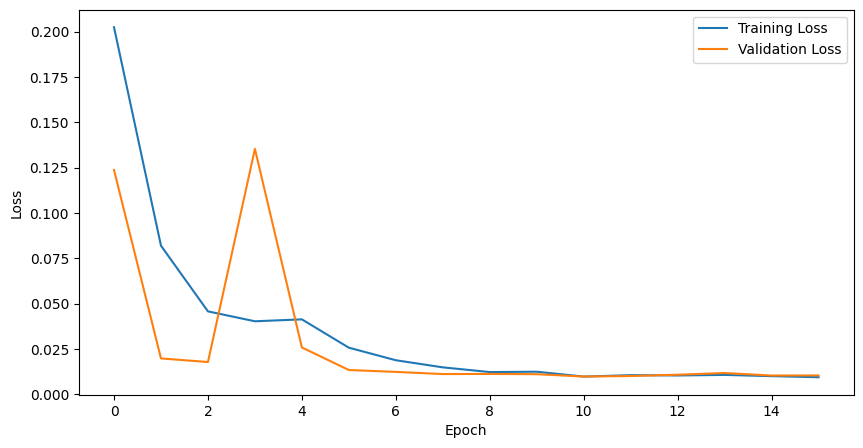

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

seed_value = 42
tf.random.set_seed(seed_value)

# Assume X_train_array is a NumPy array with shape (34, 10) and y_train with shape (34, 13314)

# Reshape X_train_array and X_val_array to be compatible with CNN input
X_train_reshaped = X_train_array.reshape(34, 10, 1)
X_val_reshaped = X_val_array.reshape(10, 10, 1)

# Define your CNN model for multi-output regression
# 修改核函数大小和池化层大小为2
model = keras.Sequential([
    layers.Conv1D(filters=16, kernel_size=2, activation='relu', input_shape=(10, 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(filters=32, kernel_size=2, activation='relu'),  # Additional Convolutional Layer
    layers.MaxPooling1D(pool_size=2),  # Additional Max Pooling Layer
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),  # Dropout layer with a dropout rate of 0.1
    layers.Dense(1024, activation='relu'),
    layers.Dense(13314)  # 13314 neurons for multi-output regression
])

# Compile the model with Mean Squared Error (MSE) loss for each output
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Stop training when validation loss stops improving
    patience=5,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore the model's weights from the epoch with the best validation loss
)

# Lists to store training and validation loss
train_loss_history = []
val_loss_history = []

# Train the model with validation data
history = model.fit(
    X_train_reshaped, y_train_array,
    epochs=100,
    batch_size=1,
    validation_data=(X_val_reshaped, y_val_array),  # Pass validation data here
    callbacks=[
        keras.callbacks.LambdaCallback(
            on_epoch_end=lambda epoch, logs: (
                train_loss_history.append(logs['loss']),
                val_loss_history.append(logs['val_loss'])
            )
        ),
        early_stopping  # Add early stopping callback
    ]
)

# Make predictions on the test set
X_test_reshaped = X_test_array.reshape(5, 10, 1)
test_predictions = model.predict(X_test_reshaped)

# Calculate R-squared (R2) and root mean squared error (RMSE)
r2 = r2_score(y_test_array, test_predictions)
rmse = np.sqrt(mean_squared_error(y_test_array, test_predictions))

print(f"R-squared (R2): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# NSE
a = 0
s = 0
for i in range(5):
  a = r2_score(y_test_array[i,:], test_predictions[i,:])
  s = s + a
  print(a)

print(s/5)

0.06493619686892038
0.775683769950771
0.9071936464660074
0.760435808596899
0.5158993254610331
0.6048297494687261


In [ ]:
# RMSE
a = 0
s = 0
for i in range(5):
  a = np.sqrt(mean_squared_error(y_test_array[i,:], test_predictions[i,:]))
  s = s + a
  print(a)

print(s/5)

0.16126169869800586
0.14823937383309743
0.09837624875736728
0.17018023082204062
0.24981447023176295
0.1655744044684548


In [ ]:
y_test_array[i,:]

array([0.779382  , 0.90393316, 0.85399193, ..., 0.54901346, 0.07907297,
       0.02989965])

In [ ]:
test_predictions[i,:]

array([ 0.44506857,  0.5811591 ,  0.524491  , ...,  0.2752356 ,
       -0.0048629 ,  0.00442054], dtype=float32)

In [ ]:
for i in range(5):
  mae = mean_absolute_error(y_test_array[i,:], test_predictions[i,:])
  print(f'The MAE is: {mae}')

The MAE is: 0.1275161051535875
The MAE is: 0.0649545299204065
The MAE is: 0.06819770664448416
The MAE is: 0.15193302175464402
The MAE is: 0.20991041674018343


In [ ]:
# 保存测试集数据
np.savetxt('y_test_array.csv',y_test_array.transpose(),delimiter=',')
np.savetxt('test_predictions.csv',test_predictions.transpose(),delimiter=',')

### 筛选变量后

Epoch 1/100
34/34 [==============================] - 2s 17ms/step - loss: 0.0931 - val_loss: 0.0168
Epoch 2/100
34/34 [==============================] - 0s 9ms/step - loss: 0.0179 - val_loss: 0.0153
Epoch 3/100
34/34 [==============================] - 0s 9ms/step - loss: 0.0157 - val_loss: 0.0151
Epoch 4/100
34/34 [==============================] - 0s 7ms/step - loss: 0.0169 - val_loss: 0.0161
Epoch 5/100
34/34 [==============================] - 0s 9ms/step - loss: 0.0121 - val_loss: 0.0121
Epoch 6/100
34/34 [==============================] - 0s 7ms/step - loss: 0.0143 - val_loss: 0.0149
Epoch 7/100
34/34 [==============================] - 0s 7ms/step - loss: 0.0115 - val_loss: 0.0141
Epoch 8/100
34/34 [==============================] - 0s 7ms/step - loss: 0.0132 - val_loss: 0.0135
Epoch 9/100
34/34 [==============================] - 0s 9ms/step - loss: 0.0111 - val_loss: 0.0112
Epoch 10/100
34/34 [==============================] - 0s 9ms/step - loss: 0.0117 - val_loss: 0.0134
Epoch 11

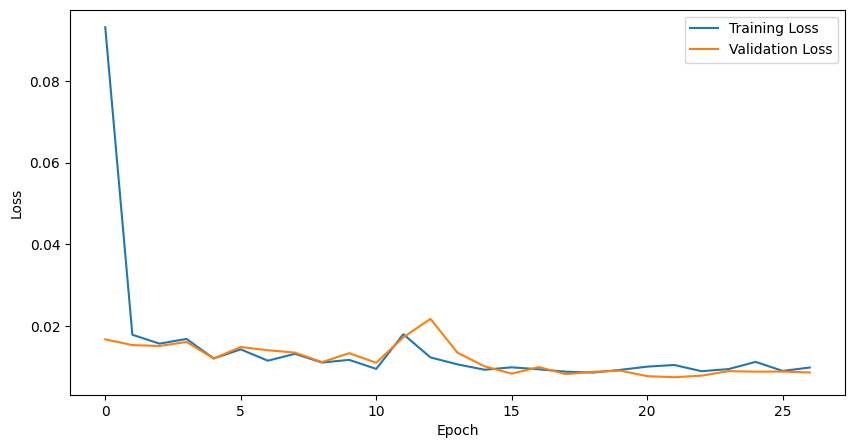

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

seed_value = 42
tf.random.set_seed(seed_value)

# Assume X_train_array is a NumPy array with shape (34, 10) and y_train with shape (34, 13314)

# Reshape X_train_array and X_val_array to be compatible with CNN input
X_train_reshaped = X_train_array[:,[2,6]].reshape(34, 2, 1)
X_val_reshaped = X_val_array[:,[2,6]].reshape(10, 2, 1)

# Define your CNN model for multi-output regression
# 修改核函数大小和池化层大小为2
model = keras.Sequential([
    layers.Conv1D(filters=16, kernel_size=1, activation='relu', input_shape=(2, 1)),
    layers.MaxPooling1D(pool_size=1),
    layers.Conv1D(filters=32, kernel_size=1, activation='relu'),  # Additional Convolutional Layer
    layers.MaxPooling1D(pool_size=1),  # Additional Max Pooling Layer
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),  # Dropout layer with a dropout rate of 0.1
    layers.Dense(1024, activation='relu'),
    layers.Dense(13314)  # 13314 neurons for multi-output regression
])

# Compile the model with Mean Squared Error (MSE) loss for each output
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Stop training when validation loss stops improving
    patience=5,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore the model's weights from the epoch with the best validation loss
)

# Lists to store training and validation loss
train_loss_history = []
val_loss_history = []

# Train the model with validation data
history = model.fit(
    X_train_reshaped, y_train_array,
    epochs=100,
    batch_size=1,
    validation_data=(X_val_reshaped, y_val_array),  # Pass validation data here
    callbacks=[
        keras.callbacks.LambdaCallback(
            on_epoch_end=lambda epoch, logs: (
                train_loss_history.append(logs['loss']),
                val_loss_history.append(logs['val_loss'])
            )
        ),
        early_stopping  # Add early stopping callback
    ]
)

# Make predictions on the test set
X_test_reshaped = X_test_array[:,[2,6]].reshape(5, 2, 1)
test_predictions2 = model.predict(X_test_reshaped)

# Calculate R-squared (R2) and root mean squared error (RMSE)
r2 = r2_score(y_test_array, test_predictions2)
rmse = np.sqrt(mean_squared_error(y_test_array, test_predictions2))

print(f"R-squared (R2): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# NSE
a = 0
s = 0
for i in range(5):
  a = r2_score(y_test_array[i,:], test_predictions2[i,:])
  s = s + a
  print(a)

print(s/5)


0.5923092042953777
0.8064112357168336
0.9555653597842623
0.9708316462913373
0.8613259419719679
0.8372886776119557


In [ ]:
# RMSE
a = 0
s = 0
for i in range(5):
  a = np.sqrt(mean_squared_error(y_test_array[i,:], test_predictions2[i,:]))
  s = s + a
  print(a)

print(s/5)

0.10647316087226304
0.13772111819956634
0.06805383703134867
0.05940804226193656
0.1336648294206193
0.10106419755714677


In [ ]:
# 保存测试集数据
np.savetxt('y_test_array.csv',y_test_array.transpose(),delimiter=',')
np.savetxt('test_predictions2.csv',test_predictions2.transpose(),delimiter=',')

## 不考虑潮位

Epoch 1/15
34/34 [==============================] - 2s 16ms/step - loss: 0.1397 - val_loss: 0.1515
Epoch 2/15
34/34 [==============================] - 0s 10ms/step - loss: 0.0899 - val_loss: 0.1016
Epoch 3/15
34/34 [==============================] - 0s 10ms/step - loss: 0.0721 - val_loss: 0.0721
Epoch 4/15
34/34 [==============================] - 0s 9ms/step - loss: 0.0696 - val_loss: 0.0670
Epoch 5/15
34/34 [==============================] - 0s 9ms/step - loss: 0.0593 - val_loss: 0.0560
Epoch 6/15
34/34 [==============================] - 0s 9ms/step - loss: 0.0547 - val_loss: 0.0466
Epoch 7/15
34/34 [==============================] - 0s 7ms/step - loss: 0.0605 - val_loss: 0.0493
Epoch 8/15
34/34 [==============================] - 0s 9ms/step - loss: 0.0555 - val_loss: 0.0438
Epoch 9/15
34/34 [==============================] - 0s 9ms/step - loss: 0.0611 - val_loss: 0.0414
Epoch 10/15
34/34 [==============================] - 0s 9ms/step - loss: 0.0588 - val_loss: 0.0410
Epoch 11/15
34/3

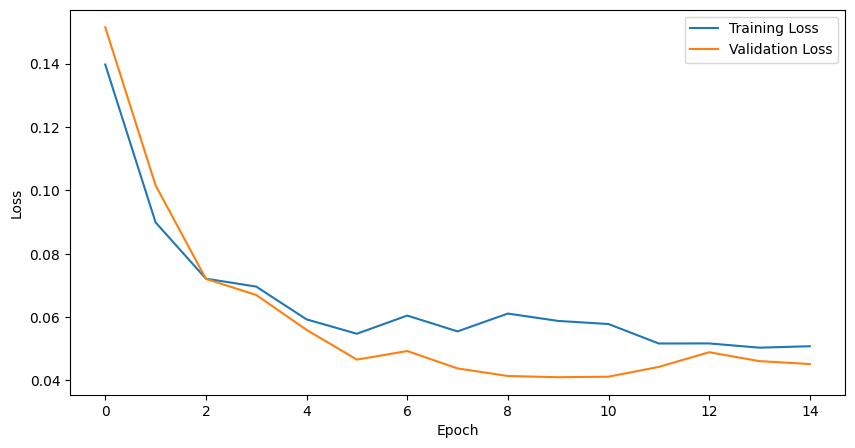

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Assume X_train_array is a NumPy array with shape (34, 10) and y_train with shape (34, 13314)

# Reshape X_train_array and X_val_array to be compatible with CNN input
X_train_reshaped = X_train_array[:,[2]].reshape(34, 1, 1)
X_val_reshaped = X_val_array[:,[2]].reshape(10, 1, 1)

# Define your CNN model for multi-output regression
# 修改核函数大小和池化层大小为2
model = keras.Sequential([
    layers.Conv1D(filters=16, kernel_size=1, activation='relu', input_shape=(1, 1)),
    layers.MaxPooling1D(pool_size=1),
    layers.Conv1D(filters=32, kernel_size=1, activation='relu'),  # Additional Convolutional Layer
    layers.MaxPooling1D(pool_size=1),  # Additional Max Pooling Layer
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.1),  # Dropout layer with a dropout rate of 0.1
    layers.Dense(1024, activation='relu'),
    layers.Dense(13314)  # 13314 neurons for multi-output regression
])

# Compile the model with Mean Squared Error (MSE) loss for each output
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Stop training when validation loss stops improving
    patience=5,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore the model's weights from the epoch with the best validation loss
)

# Lists to store training and validation loss
train_loss_history = []
val_loss_history = []

# Train the model with validation data
history = model.fit(
    X_train_reshaped, y_train_array,
    epochs=15,
    batch_size=1,
    validation_data=(X_val_reshaped, y_val_array),  # Pass validation data here
    callbacks=[
        keras.callbacks.LambdaCallback(
            on_epoch_end=lambda epoch, logs: (
                train_loss_history.append(logs['loss']),
                val_loss_history.append(logs['val_loss'])
            )
        ),
        early_stopping  # Add early stopping callback
    ]
)

# Make predictions on the test set
X_test_reshaped = X_test_array[:,[2]].reshape(5, 1, 1)
test_predictions3 = model.predict(X_test_reshaped)

# Calculate R-squared (R2) and root mean squared error (RMSE)
r2 = r2_score(y_test_array, test_predictions3)
rmse = np.sqrt(mean_squared_error(y_test_array, test_predictions3))

print(f"R-squared (R2): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# NSE
a = 0
s = 0
for i in range(5):
  a = r2_score(y_test_array[i,:], test_predictions3[i,:])
  s = s + a
  print(a)

print(s/5)


-1.8830376099842385
0.7725199076563916
0.8519457424508842
0.5234277899616047
0.2105069769239376
0.0950725614017159


In [ ]:
# RMSE
a = 0
s = 0
for i in range(5):
  a = np.sqrt(mean_squared_error(y_test_array[i,:], test_predictions3[i,:]))
  s = s + a
  print(a)

print(s/5)

0.2831391003569168
0.1492904971687737
0.12422306287117954
0.24013399107132
0.3189287600727058
0.22314308230817917


In [ ]:
# 保存测试集数据
np.savetxt('y_test_array.csv',y_test_array.transpose(),delimiter=',')
np.savetxt('test_predictions3.csv',test_predictions3.transpose(),delimiter=',')

## 构建LightGBM模型进行训练

In [ ]:
evals_result = {} # 为绘图记录评估结果
gbm = lgb.LGBMRegressor(learning_rate=0.04,
                        n_estimators=500,
                        n_jobs=4)
gbm.fit(X_train,y_train,
        categorical_feature=['Point'], # 指定分类特征
        eval_set=[(X_val,y_val)],
        eval_metric=['rmse','l1'],
        callbacks=[lgb.early_stopping(5), lgb.record_evaluation(evals_result)])

## 构建神经网络

In [ ]:
# 第一个隐藏层有100个节点，第二层有50个，激活函数用relu，梯度下降方法用adam
# 惩罚系数为0.01，最大迭代次数为200
fit1 = MLPRegressor(
        hidden_layer_sizes=(100,100,100), activation='relu',solver='adam',
        alpha=0.004,max_iter=200)

fit1.fit(X_train,y_train)
pred1_train = fit1.predict(X_train)

BP_preds1 = fit1.predict(X_test)

a = 0
s = 0
for i in range(5):
  a = r2_score(y_test.iloc[i,:],BP_preds1[i,:])
  s = s + a
  print(a)
print(s/5)

0.9367894170454047
0.5673187911706444
0.8270020141058605
0.7644564114163024
0.9549055650148502
0.8100944397506126


In [ ]:
# 保存测试集数据
np.savetxt('BP_preds1.csv',BP_preds1.transpose(),delimiter=',')

In [ ]:
# 筛选特征变量：最大潮位、总降雨量 X_train.iloc[:,[1,7]]
fit1 = MLPRegressor(
        hidden_layer_sizes=(100,100,100), activation='relu',solver='adam',
        alpha=0.004,max_iter=200)

fit1.fit(X_train.iloc[:,[1,7]],y_train)
pred1_train = fit1.predict(X_train.iloc[:,[1,7]])

BP_preds2 = fit1.predict(X_test.iloc[:,[1,7]])

a = 0
s = 0
for i in range(5):
  a = r2_score(y_test.iloc[i,:],BP_preds2[i,:])
  s = s + a
  print(a)
print(s/5)

0.8909208732447209
-0.7550720652655101
0.7987580489890143
0.7369486410286231
0.9627080857212126
0.5268527167436121


In [ ]:
r2_score(y_train,pred1_train)

0.5896473939957169

In [ ]:
np.savetxt('y_train.csv',y_train.transpose(),delimiter=',')
np.savetxt('predict.csv',pred1_train.transpose(),delimiter=',')

In [ ]:
r2_score(y_test.iloc[3,:],BP_preds1[3,:]) # 未经筛选
# 0.7421637272774131
# 0.8549472542017674
# 0.9636490428010317
# 0.7270512111864296

0.939560465972295

In [ ]:
for i in range(5):
  print(r2_score(y_test.iloc[i,:],BP_preds1[i,:])) # 未经筛选

0.9353905674109753
0.9586023235488258
0.8159038539424602
0.24838961913499102
0.7485552367630004


In [ ]:
for i in range(5):
  print(r2_score(y_test.iloc[i,:],BP_preds2[i,:])) # 筛选后的

0.8650503813000193
0.9599369805852009
0.7890729852686253
-0.8539988006913966
0.7375972041886789


## 构建RF模型


In [ ]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(OH_X_train,y_train)

TypeError: ignored

## 构建XGBoost模型

In [ ]:
xgb_model = XGBRegressor(learning_rate=0.03, n_estimators=300, n_jobs=4)
xgb_model.fit(OH_X_train,y_train,
              early_stopping_rounds=5,
              eval_set=[(OH_X_valid,y_val)],
              verbose=False)

[08:55:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.03, n_estimators=300, n_jobs=4)

# 构建SVR模型

In [ ]:
SVR_model = SVR()
SVR_model.fit(X_train, y_train)

ValueError: ignored

## 构建决策树模型

In [ ]:
DT_model = DecisionTreeRegressor()
DT_model.fit(OH_X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


DecisionTreeRegressor()

## 构建KNN模型

In [ ]:
KNN_model = KNeighborsRegressor()
KNN_model.fit(OH_X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


KNeighborsRegressor()

## 绘制训练过程中的指标变化情况

In [ ]:
def render_metric(metric_name):
    ax = lgb.plot_metric(evals_result, metric=metric_name, figsize=(10, 5))
    plt.show()

if INTERACTIVE:
    # create widget to switch between metrics
    interact(render_metric, metric_name=['rmse','l2'])
else:
    render_metric('rmse')

interactive(children=(Dropdown(description='metric_name', options=('rmse', 'l2'), value='rmse'), Output()), _d…

## 绘制特征重要性

In [ ]:
def render_plot_importance(importance_type, max_features=10,
                           ignore_zero=True, precision=3):
    ax = lgb.plot_importance(gbm, importance_type=importance_type,
                             max_num_features=max_features,
                             ignore_zero=ignore_zero, figsize=(12, 8),
                             precision=precision)
    plt.show()

if INTERACTIVE:
    # create widget for interactive feature importance plot
    interact(render_plot_importance,
             importance_type=['split', 'gain'],
             max_features=(1, X_train.shape[-1]),
             precision=(0, 10))
else:
    render_plot_importance(importance_type='split')

interactive(children=(Dropdown(description='importance_type', options=('split', 'gain'), value='split'), IntSl…

## 在测试集上进行预测并评估
评估指标：
- RMSE
- MAPE
- SSE
- NSE
- $R^2_{adjusted}$

*均在未归一化的原始数据上计算评估指标*

In [ ]:
df_data_mean.depth

0.7216249550788679

In [ ]:
# 在测试集上预测
y_pred = gbm.predict(X_test,num_iteration=gbm.best_iteration_)

# RMSE评估
rmse_test = mean_squared_error(y_test, y_pred) ** 0.5
#print(f'The RMSE of prediction is: {rmse_test}')

y_pred_raw = y_pred * df_data_std.depth + df_data_mean.depth
y_test_raw = y_test * df_data_std.depth + df_data_mean.depth
rmse_test_raw = mean_squared_error(y_test_raw,y_pred_raw) ** 0.5 # mse加根号即是rmse
print(f'The RMSE of raw prediction is: {rmse_test_raw}')

mape = mean_absolute_percentage_error(y_test_raw,y_pred_raw)
print(f'The MAPE of raw prediction is: {mape}')

# 计算纳什效率系数
H_obs = y_test
H_m = y_pred
H_obs_mean = H_obs.mean()
SSE = ((H_obs - H_m)**2).sum()
SST = ((H_obs - H_obs_mean)**2).sum()
NSE = 1 - SSE / SST
n = y_test.shape[0]
k = X_test.shape[1]
Adjusted_R2 = 1 - (1 - NSE) * (n-1) / (n-k-1)
print(f'The SSE of raw prediction is: {SSE}')
print(f'The NSE of raw prediction is: {NSE}')
print(f'The adjusted R2 of raw prediction is: {Adjusted_R2}')

# 计算R2_score
#R2 = r2_score(y_test_raw,y_pred_raw)
#print(f'The R2 score of prediction is: {R2}')

data = [rmse_test_raw, mape, SSE, NSE, Adjusted_R2]
index = ['RMSE','MAPE','SSE','NSE','R2_adj']
columns = ['LightGBM']
LightGBM_result = pd.DataFrame(data=data,index=index,columns=columns)

The RMSE of raw prediction is: 0.03365748354135698
The MAPE of raw prediction is: 0.04798170643342543
The SSE of raw prediction is: 0.910486731877922
The NSE of raw prediction is: 0.98611772405741
The adjusted R2 of raw prediction is: 0.9820991704950813


## 评估神经网络模型

In [ ]:
BP_preds = fit1.predict(X_test)
r2_score(y_test.iloc[3,:],BP_preds[3,:])

0.9625619670615414

In [ ]:
BP_preds = fit1.predict(X_test)

# RMSE评估
BP_pred_raw = BP_preds
BP_test_raw = y_test
rmse_test_raw = mean_squared_error(BP_test_raw,BP_pred_raw) ** 0.5 # mse加根号即是rmse
print(f'The RMSE of raw prediction is: {rmse_test_raw}')

mape = mean_absolute_percentage_error(BP_test_raw,BP_pred_raw)
print(f'The MAPE of raw prediction is: {mape}')

# 计算纳什效率系数
H_obs = y_test
H_m = BP_preds
H_obs_mean = H_obs.mean()
SSE = ((H_obs - H_m)**2).sum()
SST = ((H_obs - H_obs_mean)**2).sum()
NSE = 1 - SSE / SST
n = y_test.shape[0]
k = X_test.shape[1]
Adjusted_R2 = 1 - (1 - NSE) * (n-1) / (n-k-1)
print(f'The SSE of raw prediction is: {SSE}')
print(f'The NSE of raw prediction is: {NSE}')
print(f'The adjusted R2 of raw prediction is: {Adjusted_R2}')

data = [rmse_test_raw, mape, SSE, NSE, Adjusted_R2]
index = ['RMSE','MAPE','SSE','NSE','R2_adj']
columns = ['BP']
BP_result = pd.DataFrame(data=data,index=index,columns=columns)

The RMSE of raw prediction is: 0.15364397484729508
The MAPE of raw prediction is: 76994203459538.78
The SSE of raw prediction is: 0        0.057655
1        0.153044
2        0.109880
3        0.101288
4        0.002814
           ...   
13309    0.093347
13310    0.154424
13311    0.007182
13312    0.000111
13313    0.000594
Length: 13314, dtype: float64
The NSE of raw prediction is: 0        0.863841
1        0.705816
2        0.770649
3        0.782533
4        0.707802
           ...   
13309    0.795296
13310    0.740961
13311    0.967118
13312    0.978881
13313    0.170716
Length: 13314, dtype: float64
The adjusted R2 of raw prediction is: 0        1.090773
1        1.196123
2        1.152900
3        1.144978
4        1.194799
           ...   
13309    1.136469
13310    1.172693
13311    1.021921
13312    1.014080
13313    1.552856
Length: 13314, dtype: float64


## 评估RF模型

In [ ]:
RF_preds = forest_model.predict(OH_X_test)

# RMSE评估
RF_pred_raw = RF_preds * df_data_std.depth + df_data_mean.depth
RF_test_raw = y_test * df_data_std.depth + df_data_mean.depth
rmse_test_raw = mean_squared_error(RF_test_raw,RF_pred_raw) ** 0.5 # mse加根号即是rmse
print(f'The RMSE of raw prediction is: {rmse_test_raw}')

mape = mean_absolute_percentage_error(RF_test_raw,RF_pred_raw)
print(f'The MAPE of raw prediction is: {mape}')

# 计算纳什效率系数
H_obs = y_test
H_m = RF_preds
H_m_mean = H_obs.mean()
SSE = ((H_obs - H_m)**2).sum()
SST = ((H_obs - H_obs_mean)**2).sum()
NSE = 1 - SSE / SST
n = y_test.shape[0]
k = OH_X_test.shape[1]
Adjusted_R2 = 1 - (1 - NSE) * (n-1) / (n-k-1)
print(f'The SSE of raw prediction is: {SSE}')
print(f'The NSE of raw prediction is: {NSE}')
print(f'The adjusted R2 of raw prediction is: {Adjusted_R2}')

data = [rmse_test_raw, mape, SSE, NSE, Adjusted_R2]
index = ['RMSE','MAPE','SSE','NSE','R2_adj']
columns = ['RF']
RF_result = pd.DataFrame(data=data,index=index,columns=columns)

The RMSE of raw prediction is: 0.03814614749614497
The MAPE of raw prediction is: 0.0725393589624704
The SSE of raw prediction is: 1.166826091690747
The NSE of raw prediction is: 0.9822092939800944
The adjusted R2 of raw prediction is: 0.9699398415525733


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


# 评估XGBoost模型

In [ ]:
xgb_preds = xgb_model.predict(OH_X_test)

# RMSE评估
xgb_pred_raw = xgb_preds * df_data_std.depth + df_data_mean.depth
xgb_test_raw = y_test * df_data_std.depth + df_data_mean.depth
rmse_test_raw = mean_squared_error(xgb_test_raw,xgb_pred_raw) ** 0.5 # mse加根号即是rmse
print(f'The RMSE of raw prediction is: {rmse_test_raw}')

mape = mean_absolute_percentage_error(xgb_test_raw,xgb_pred_raw)
print(f'The MAPE of raw prediction is: {mape}')

# 计算纳什效率系数
H_obs = y_test
H_m = xgb_preds
H_m_mean = H_obs.mean()
SSE = ((H_obs - H_m)**2).sum()
SST = ((H_obs - H_obs_mean)**2).sum()
NSE = 1 - SSE / SST
n = y_test.shape[0]
k = OH_X_test.shape[1]
Adjusted_R2 = 1 - (1 - NSE) * (n-1) / (n-k-1)
print(f'The SSE of raw prediction is: {SSE}')
print(f'The NSE of raw prediction is: {NSE}')
print(f'The adjusted R2 of raw prediction is: {Adjusted_R2}')

data = [rmse_test_raw, mape, SSE, NSE, Adjusted_R2]
index = ['RMSE','MAPE','SSE','NSE','R2_adj']
columns = ['XGBoost']
XGBoost_result = pd.DataFrame(data=data,index=index,columns=columns)

The RMSE of raw prediction is: 0.03664791050182559
The MAPE of raw prediction is: 0.054807524353679665
The SSE of raw prediction is: 1.076968933598501
The NSE of raw prediction is: 0.9835793544327938
The adjusted R2 of raw prediction is: 0.9722547712829963


## 评估SVR模型

In [ ]:
SVR_preds = SVR_model.predict(OH_X_test)

# RMSE评估
SVR_pred_raw = SVR_preds * df_data_std.depth + df_data_mean.depth
SVR_test_raw = y_test * df_data_std.depth + df_data_mean.depth
rmse_test_raw = mean_squared_error(SVR_test_raw,SVR_pred_raw) ** 0.5 # mse加根号即是rmse
print(f'The RMSE of raw prediction is: {rmse_test_raw}')

mape = mean_absolute_percentage_error(SVR_test_raw,SVR_pred_raw)
print(f'The MAPE of raw prediction is: {mape}')

# 计算纳什效率系数
H_obs = y_test
H_m = SVR_preds
H_m_mean = H_obs.mean()
SSE = ((H_obs - H_m)**2).sum()
SST = ((H_obs - H_obs_mean)**2).sum()
NSE = 1 - SSE / SST
n = y_test.shape[0]
k = OH_X_test.shape[1]
Adjusted_R2 = 1 - (1 - NSE) * (n-1) / (n-k-1)
print(f'The SSE of raw prediction is: {SSE}')
print(f'The NSE of raw prediction is: {NSE}')
print(f'The adjusted R2 of raw prediction is: {Adjusted_R2}')

data = [rmse_test_raw, mape, SSE, NSE, Adjusted_R2]
index = ['RMSE','MAPE','SSE','NSE','R2_adj']
columns = ['SVR']
SVR_result = pd.DataFrame(data=data,index=index,columns=columns)

The RMSE of raw prediction is: 0.056299885515616085
The MAPE of raw prediction is: 0.10292485612296062
The SSE of raw prediction is: 2.5416736585382873
The NSE of raw prediction is: 0.9612468651673096
The adjusted R2 of raw prediction is: 0.9345205652826956


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


## 评估决策树模型

In [ ]:
DT_preds = DT_model.predict(OH_X_test)

# RMSE评估
DT_pred_raw = DT_preds * df_data_std.depth + df_data_mean.depth
DT_test_raw = y_test * df_data_std.depth + df_data_mean.depth
rmse_test_raw = mean_squared_error(DT_test_raw,DT_pred_raw) ** 0.5 # mse加根号即是rmse
print(f'The RMSE of raw prediction is: {rmse_test_raw}')

mape = mean_absolute_percentage_error(DT_test_raw,DT_pred_raw)
print(f'The MAPE of raw prediction is: {mape}')

# 计算纳什效率系数
H_obs = y_test
H_m = DT_preds
H_m_mean = H_obs.mean()
SSE = ((H_obs - H_m)**2).sum()
SST = ((H_obs - H_obs_mean)**2).sum()
NSE = 1 - SSE / SST
n = y_test.shape[0]
k = OH_X_test.shape[1]
Adjusted_R2 = 1 - (1 - NSE) * (n-1) / (n-k-1)
print(f'The SSE of raw prediction is: {SSE}')
print(f'The NSE of raw prediction is: {NSE}')
print(f'The adjusted R2 of raw prediction is: {Adjusted_R2}')

data = [rmse_test_raw, mape, SSE, NSE, Adjusted_R2]
index = ['RMSE','MAPE','SSE','NSE','R2_adj']
columns = ['DT']
DT_result = pd.DataFrame(data=data,index=index,columns=columns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


The RMSE of raw prediction is: 0.04115051664051769
The MAPE of raw prediction is: 0.05351649362749688
The SSE of raw prediction is: 1.3578611060259287
The NSE of raw prediction is: 0.9792965653363416
The adjusted R2 of raw prediction is: 0.9650183345338185


## 评估KNN模型
注意力机制

In [ ]:
KNN_preds = KNN_model.predict(OH_X_test)

# RMSE评估
KNN_pred_raw = KNN_preds * df_data_std.depth + df_data_mean.depth
KNN_test_raw = y_test * df_data_std.depth + df_data_mean.depth
rmse_test_raw = mean_squared_error(KNN_test_raw,KNN_pred_raw) ** 0.5 # mse加根号即是rmse
print(f'The RMSE of raw prediction is: {rmse_test_raw}')

mape = mean_absolute_percentage_error(KNN_test_raw,KNN_pred_raw)
print(f'The MAPE of raw prediction is: {mape}')

# 计算纳什效率系数
H_obs = y_test
H_m = KNN_preds
H_m_mean = H_obs.mean()
SSE = ((H_obs - H_m)**2).sum()
SST = ((H_obs - H_obs_mean)**2).sum()
NSE = 1 - SSE / SST
n = y_test.shape[0]
k = OH_X_test.shape[1]
Adjusted_R2 = 1 - (1 - NSE) * (n-1) / (n-k-1)
print(f'The SSE of raw prediction is: {SSE}')
print(f'The NSE of raw prediction is: {NSE}')
print(f'The adjusted R2 of raw prediction is: {Adjusted_R2}')

data = [rmse_test_raw, mape, SSE, NSE, Adjusted_R2]
index = ['RMSE','MAPE','SSE','NSE','R2_adj']
columns = ['KNN']
KNN_result = pd.DataFrame(data=data,index=index,columns=columns)

The RMSE of raw prediction is: 0.10208212639707034
The MAPE of raw prediction is: 0.192497108130055
The SSE of raw prediction is: 8.356110615996911
The NSE of raw prediction is: 0.8725936037103852
The adjusted R2 of raw prediction is: 0.7847271235106508


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
pd.concat([LightGBM_result, RF_result, XGBoost_result, SVR_result, KNN_result], axis='columns')

,LightGBM,RF,XGBoost,SVR,KNN
RMSE,0.034554,0.038146,0.036648,0.056300,0.102082
MAPE,0.047456,0.072539,0.054808,0.102925,0.192497
SSE,0.957430,1.166826,1.076969,2.541674,8.356111
NSE,0.985402,0.982209,0.983579,0.961247,0.872594
R2_adj,0.981176,0.969940,0.972255,0.934521,0.784727


### 真实值和预测值及其绝对误差

In [ ]:
depth = [list(y_test_raw), list(y_pred_raw), list(RF_pred_raw), list(xgb_pred_raw), list(SVR_pred_raw), list(DT_pred_raw), list(KNN_pred_raw)]
depth = np.transpose(depth) # 转置
cols = ['Real', 'LGBM', 'RF', 'XGBoost', 'SVR', 'DF', 'KNN']
df = pd.DataFrame(data=depth,columns=cols)
df.to_csv('result.csv')

## 绘制各模型在测试集上的散点图

In [ ]:
y_pred_raw


array([0.40745701, 0.72045306, 0.32262422, 0.90401416, 0.29862658,
       1.03107924, 0.84424668, 0.67270667, 0.7952261 , 0.13878489,
       1.00737951, 0.86342553, 0.77560664, 0.2455029 , 0.97985524,
       0.86010325, 0.93814535, 0.8152452 , 0.70217206, 1.12970624,
       0.88755584, 0.57587802, 0.40762295, 0.62548307, 1.10294427,
       0.90959631, 1.20164494, 0.81137459, 0.67504651, 0.81840955,
       0.97149848, 0.91593381, 0.34562297, 1.13711308, 0.6568111 ,
       0.20965816, 0.58436426, 0.90351203, 0.95571056, 0.9206493 ,
       0.8197535 , 0.76070705, 0.25911089, 0.88345418, 0.29891012,
       1.16956171, 1.15339898, 0.55039533, 0.67702351, 0.68775322])

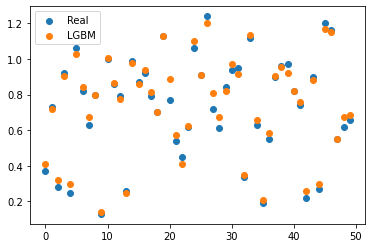

In [ ]:
x = range(y_test.shape[0])
plt.scatter(x,y_test_raw,label='Real')
plt.scatter(x,y_pred_raw,label='LGBM')
#plt.scatter(x,RF_pred_raw,label='RF')
#plt.scatter(x,xgb_pred_raw,label='XGBoost')
#plt.scatter(x,SVR_pred_raw,label='SVR')
#plt.scatter(x,DF_pred_raw,label='DF')
#plt.scatter(x,KNN_pred_raw,label='KNN')
plt.legend(loc='upper left')